<a href="https://colab.research.google.com/github/amandasbassani/Notebooks_Processamento_Digital_de_Imagens/blob/main/Labs/Lab3_Amanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATÓRIO 3 DE PROCESSAMENTO DIGITAL DE IMAGENS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importar bibliotecas
#%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import skimage.io

#Questão 1: Visualize o histograma do ruído nas imagens Fig5.04(a).jpg, Fig5.04(h).jpg, Fig5.04(i).jpg e Fig6.48(a).jpg. Compare os resultados.

In [ ]:
!pip install hyperspy
import hyperspy.api as hs
import scipy.misc

def rec(im, left=40, right=215, top=42, bottom=58):
  im.plot()
  roi = hs.roi.RectangularROI(left=left, right=right, top=top, bottom=bottom)
  im_roi = roi.interactive(im, color="red")
  roi_hist = hs.interactive(im_roi.get_histogram,
                          event=roi.events.changed,
                            range_bins =(0,255),
                              bins=128, # Set number of bins for `get_histogram`
                          recompute_out_event=None)
  roi_hist.plot()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.6 MB 43.5 MB/s 
     |████████████████████████████████| 5.1 MB 33.0 MB/s 
     |████████████████████████████████| 209 kB 55.3 MB/s 
     |████████████████████████████████| 153 kB 65.7 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 3.3 MB 41.0 MB/s 
     |████████████████████████████████| 140 kB 55.6 MB/s 
     |████████████████████████████████| 296 kB 47.1 MB/s 
     |████████████████████████████████| 34.5 MB 1.3 MB/s 
     |████████████████████████████████| 6.2 MB 33.2 MB/s 
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=921c868e3f9510987dd4a4d575a461e89a88ec3e029d501396875972f14a2eb6
  Stored in directory: /root/.cache/pip/wheels/12/1c/38/0def51e15add93bff3f4bf9c248b94db0839b980b8535e72a0
Successfully built asciitree
  Attempting uninstall: llvmlit

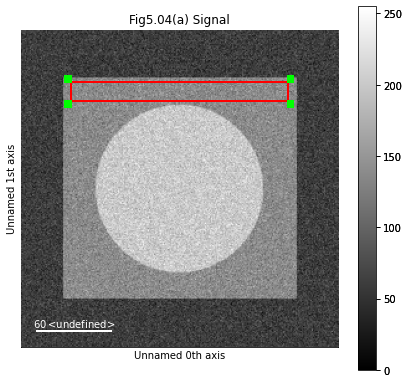

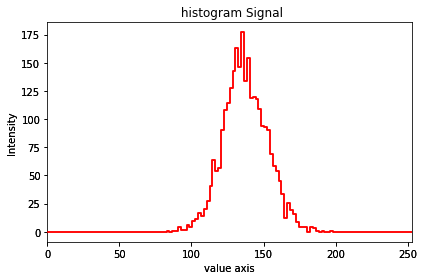

In [ ]:
im = hs.load('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.04(a).jpg')
rec(im, left=40, right=215, top=42, bottom=58)

#Questão 2: Realize uma filtragem na imagem Fig5.10(a).jpg usando os filtros:

#a) De média 

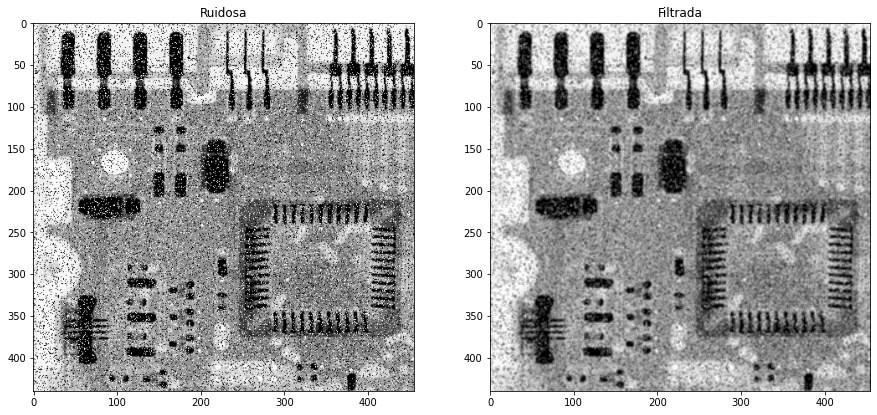

In [ ]:
from skimage import filters, morphology
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.10(a).jpg') 

selem = morphology.rectangle(3,3) 
im2_f = filters.rank.mean(im2, selem=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im2_f,cmap='gray')
axs[0].set_title('Ruidosa')
axs[1].set_title('Filtrada');

#b)	De mediana

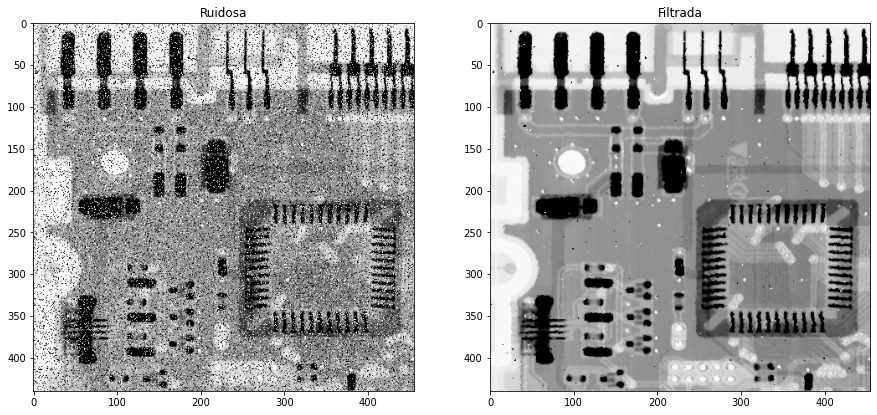

In [ ]:
from skimage import filters, morphology
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.10(a).jpg') 

selem = morphology.rectangle(3,3) 
im2_f = filters.rank.median(im2, selem=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im2_f,cmap='gray')
axs[0].set_title('Ruidosa')
axs[1].set_title('Filtrada');

#c) De máximo e de mínimo 

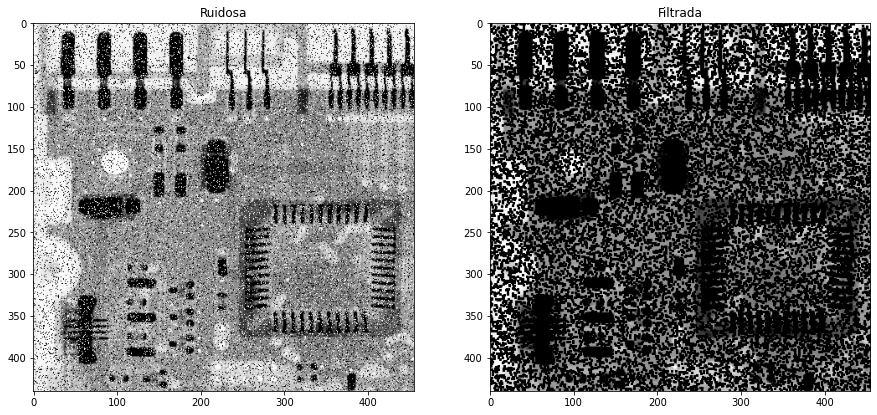

In [ ]:
from skimage import filters, morphology
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.10(a).jpg') 

selem = morphology.rectangle(3,3) 
im2_f = filters.rank.minimum(im2, selem=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im2_f,cmap='gray')
axs[0].set_title('Ruidosa')
axs[1].set_title('Filtrada');

# d) De mediana, depois de máximo e de mínimo

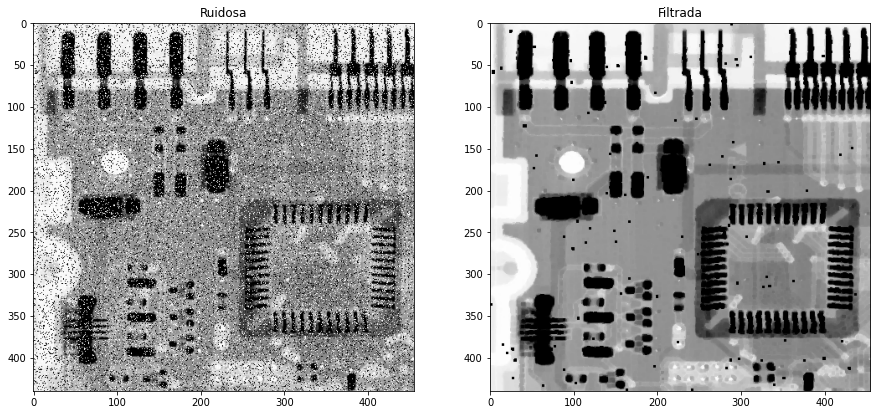

In [ ]:
from skimage import filters, morphology
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.10(a).jpg') 

selem = morphology.rectangle(3,3) 
im2_f = filters.rank.median(im2, selem=selem)
im3_f = filters.rank.minimum(im2_f, selem=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im3_f,cmap='gray')
axs[0].set_title('Ruidosa')
axs[1].set_title('Filtrada');

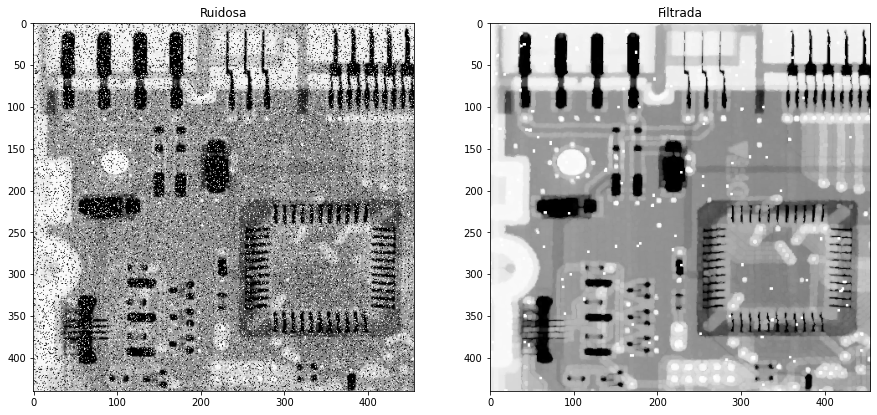

In [ ]:
from skimage import filters, morphology
im2 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.10(a).jpg') 

selem = morphology.rectangle(3,3) 
im2_f = filters.rank.median(im2, selem=selem)
im3_f = filters.rank.maximum(im2_f, selem=selem)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im2,cmap='gray')
axs[1].imshow(im3_f,cmap='gray')
axs[0].set_title('Ruidosa')
axs[1].set_title('Filtrada');

#Questão 3:	Borre a imagem Fig5.26(a).jpg com um filtro passa-baixas Butterworth de ordem 2 e depois adicione um ruído Gaussiano nela. Faça o procedimento de filtragem inversa completa e filtragem de Wiener e analise os resultados. 

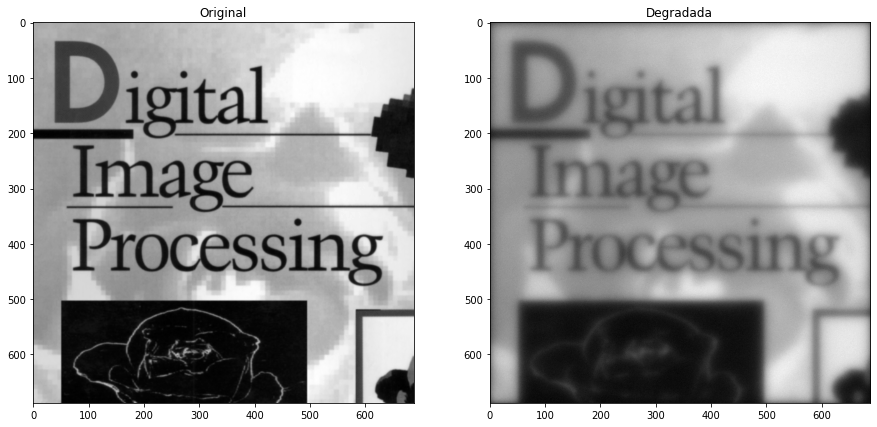

In [ ]:
im3 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.26(a).jpg')

im_fill = np.zeros((2*im3.shape[0],2*im3.shape[1]))
im_fill[0:im3.shape[0],0:im3.shape[1]] = im3
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im3.shape[0], im3.shape[0], 1)
x = np.arange(-im3.shape[1], im3.shape[1], 1)
u, v = np.meshgrid(x, y)

D = np.sqrt(u**2 + v**2)

D0 = 30

#Filtro Butterworth ordem 1
n = 1
H_but = np.zeros((2*im2.shape[0],2*im2.shape[1]))
H_but = 1/(1+(D/D0)**(2*n))

#Filtrangem Butterworth
G_but = F_shift*H_but
im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
im_but = im_but_fill[0:im3.shape[0],0:im3.shape[1]]

#adiciona ruido Gaussiano
var = 10;
ruido = np.random.normal(0,np.sqrt(var),(im3.shape[0],im3.shape[1]));
im_deg = im_but + ruido;

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axs[0].imshow(im3,cmap='gray')
axs[1].imshow(im_deg,cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Degradada');

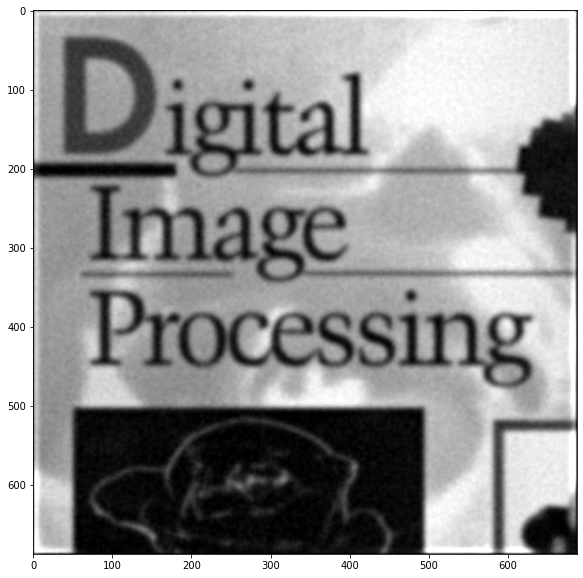

In [ ]:
im_fill = np.zeros((2*im_deg.shape[0],2*im_deg.shape[1]))
im_fill[0:im_deg.shape[0],0:im_deg.shape[1]] = im_deg
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

y = np.arange(-im_deg.shape[0], im_deg.shape[0], 1)
x = np.arange(-im_deg.shape[1], im_deg.shape[1], 1)
u, v = np.meshgrid(x, y)

H = H_but.copy()

G_but = F_shift/H # filtragem inversa, imagem fica bem ruim de se visualizar
G_but = F_shift*((1/H)*H*np.conjugate(H)/(H*np.conjugate(H) + 0.01))

im_but_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_but)))
im_but = im_but_fill[0:im_deg.shape[0],0:im_deg.shape[1]]

plt.figure(figsize = (10,10))
plt.imshow(im_but,cmap='gray',vmin=0,vmax=255)
plt.show()

#Questão 4: Adicione pseudocores na imagem Fig5.35(a).jpg

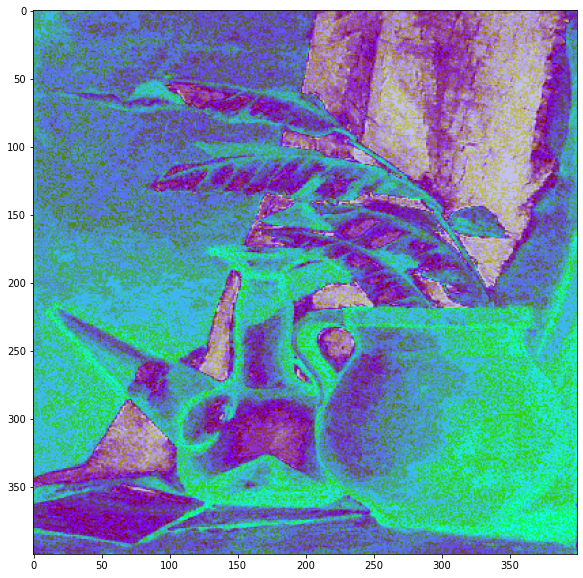

In [ ]:
im4 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig5.35(a).jpg')

im_pseudocolor = np.zeros((im4.shape[0],im4.shape[1],3))

im_pseudocolor[:,:,0] = 0.8*im4/255 # np.abs(np.sin(im4*0.05)) 
im_pseudocolor[:,:,1] = np.abs(np.cos(im4*0.01)) # 0.7*im4/255
im_pseudocolor[:,:,2] = np.abs(np.cos(im4*0.8))

plt.figure(figsize = (10,10))
plt.imshow(im_pseudocolor,vmin=0,vmax=1)
plt.show()

#Questão 5: Faça o fatiamento de cores para destacar somente as pétalas da imagem Fig6.35(1).jpg. 

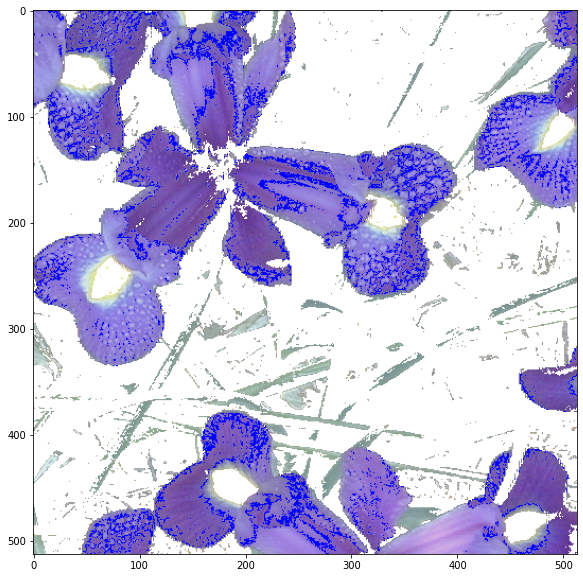

In [ ]:
im4 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig6.35(1).jpg')



for l in range(0,im4.shape[0]):
    for c in range(0,im4.shape[1]):
        if im4[l][c][2] > 140:
            if im4[l][c][1] > 100 and im4[l][c][1] < 110:
                if im4[l][c][0] > 70 and im4[l][c][0] < 140:
                    im4[l][c][2] = 255
                    im4[l][c][1] = 0
                    im4[l][c][0] = 0
        else:
            im4[l][c][2] = 255
            im4[l][c][1] = 255
            im4[l][c][0] = 255


plt.figure(figsize = (10,10))
plt.imshow(im4,vmin=0,vmax=1)
plt.show()

#Questão 6:	Corrija a tonalidade da imagem Fig6.35(5).jpg. Faça o desbalanceamento de cores na imagem de forma a aumentar a quantidade de amarelo.

#Questão 7:	Obtenha o complemento de cores (negativo da imagem) na imagem Fig6.30(01).jpg. Faça isso tanto no espaço de cor RGB quanto no espaço HSI.

In [ ]:
from skimage.color import rgb2hsv
im7 = skimage.io.imread('/content/drive/MyDrive/PDI/Labs/Lab3-Amanda/Lab3/Fig6.30(01).jpg')

hsv_img = rgb2hsv(im7)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(20, 20))
ax0.imshow(im7)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='gray')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(saturation_img, cmap='gray')
ax2.set_title("Saturation channel")
ax2.axis('off')
ax3.imshow(value_img, cmap='gray')
ax3.set_title("Value channel")
ax3.axis('off')

fig.tight_layout()